In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

In [104]:
Choc = pd.read_csv('C:\\Users\\cocob\\Downloads\\flavors_of_cacao.csv')

In [105]:
Choc.head(11)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [107]:
Choc.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [108]:
Choc.rename(columns={'Specific Bean Origin\nor Bar Name':'Specific_Bean', 'Review\nDate':'Review Date', 'Cocoa\nPercent':'Cocoa Percent', 'Company\nLocation':'Company Location', 'Bean\nType':'Bean Type', 'Broad Bean\nOrigin':'Bean Origin'}, inplace=True)

In [109]:
Choc['Cocoa Percent']= Choc['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

In [137]:
Choc.describe()

,REF,Review Date,Cocoa Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.716983,3.185933
std,552.886365,2.927210,0.063231,0.478062
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,2.875000
50%,1069.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


In [151]:
Choc.groupby(by='Bean Type').describe().round(2)

Cocoa Percent                                      \
                                 count  mean   std   min   25%   50%   75%   
Bean Type                                                                    
Amazon                             1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Amazon mix                         2.0  0.74  0.00  0.74  0.74  0.74  0.74   
Amazon, ICS                        2.0  0.68  0.01  0.67  0.67  0.68  0.68   
Beniano                            3.0  0.71  0.04  0.67  0.70  0.72  0.73   
Blend                             41.0  0.71  0.06  0.55  0.70  0.70  0.74   
Blend-Forastero,Criollo            1.0  0.70   NaN  0.70  0.70  0.70  0.70   
CCN51                              1.0  0.65   NaN  0.65  0.65  0.65  0.65   
Criollo                          153.0  0.72  0.06  0.58  0.70  0.71  0.75   
Criollo (Amarru)                   2.0  0.70  0.00  0.70  0.70  0.70  0.70   
Criollo (Ocumare 61)               2.0  0.74  0.02  0.72  0.73  0.74  0.74   
Criollo (Ocumare 67)               1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Criollo (Ocumare 77)               1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Criollo (Ocumare)                  1.0  0.80   NaN  0.80  0.80  0.80  0.80   
Criollo (Porcelana)               10.0  0.70  0.04  0.64  0.69  0.70  0.73   
Criollo (Wild)                     1.0  0.68   NaN  0.68  0.68  0.68  0.68   
Criollo, +                         1.0  0.65   NaN  0.65  0.65  0.65  0.65   
Criollo, Forastero                 2.0  0.76  0.02  0.75  0.76  0.76  0.77   
Criollo, Trinitario               39.0  0.72  0.05  0.61  0.70  0.70  0.75   
EET                                3.0  0.71  0.05  0.67  0.68  0.70  0.74   
Forastero                         87.0  0.72  0.07  0.57  0.70  0.70  0.75   
Forastero (Amelonado)              1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Forastero (Arriba)                37.0  0.73  0.12  0.55  0.65  0.72  0.77   
Forastero (Arriba) ASS             6.0  0.69  0.10  0.58  0.60  0.68  0.78   
Forastero (Arriba) ASSS            1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Forastero (Catongo)                2.0  0.72  0.04  0.70  0.71  0.72  0.74   
Forastero (Nacional)              52.0  0.73  0.07  0.53  0.70  0.70  0.75   
Forastero (Parazinho)              8.0  0.69  0.10  0.50  0.68  0.70  0.71   
Forastero(Arriba, CCN)             1.0  0.75   NaN  0.75  0.75  0.75  0.75   
Forastero, Trinitario              1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Matina                             3.0  0.74  0.07  0.70  0.70  0.70  0.76   
Nacional                           2.0  0.71  0.01  0.70  0.70  0.71  0.72   
Nacional (Arriba)                  3.0  0.73  0.03  0.70  0.72  0.75  0.75   
Trinitario                       419.0  0.72  0.05  0.55  0.70  0.70  0.75   
Trinitario (85% Criollo)           2.0  0.70  0.00  0.70  0.70  0.70  0.70   
Trinitario (Amelonado)             1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Trinitario (Scavina)               1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Trinitario, Criollo                9.0  0.68  0.03  0.65  0.65  0.70  0.70   
Trinitario, Forastero              2.0  0.70  0.06  0.66  0.68  0.70  0.73   
Trinitario, Nacional               1.0  0.70   NaN  0.70  0.70  0.70  0.70   
Trinitario, TCGA                   1.0  0.72   NaN  0.72  0.72  0.72  0.72   
                                 887.0  0.72  0.07  0.42  0.70  0.70  0.74   

                                  REF            ...   Rating        \
                           max  count     mean   ...      75%   max   
Bean Type                                        ...                  
Amazon                    0.70    1.0  1748.00   ...     3.25  3.25   
Amazon mix                0.74    2.0  1764.00   ...     3.88  4.00   
Amazon, ICS               0.68    2.0  1491.50   ...     3.69  3.75   
Beniano                   0.74    3.0  1589.00   ...     3.88  4.00   
Blend                     0.91   41.0   551.54   ...     3.50  5.00   
Blend-Forastero,Criollo 

In [155]:
Choc[Choc['Company Location'] == 'U.S.A.'].sort_values(['Cocoa Percent', 'Rating'], ascending=False).head(5)

,Company (Maker-if known),Specific_Bean,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
1720,Vintage Plantations (Tulicorp),"Los Rios, Rancho Grande 2004/2007",153,2007,1.00,U.S.A.,2.00,Forastero (Arriba),Ecuador
1623,TCHO,Peru- Ecuador,915,2012,0.99,U.S.A.,3.25,,"Peru, Ecuador"
759,Guittard,Nocturne,387,2009,0.91,U.S.A.,3.00,,
1658,Theo,"Venezuela; Barinos, Merida, Tachron",188,2007,0.91,U.S.A.,2.00,Blend,Venezuela
1716,Videri,Dark,1117,2013,0.90,U.S.A.,3.75,,Central and S. America


In [156]:
Choc[Choc['Company Location'] == 'U.S.A.'].sort_values(['Cocoa Percent', 'Rating'], ascending=True).head(5)

,Company (Maker-if known),Specific_Bean,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
631,Ethel's Artisan (Mars),"Peru, Madagascar",666,2011,0.55,U.S.A.,2.50,,"Peru, Madagascar"
632,Ethel's Artisan (Mars),Trinidad,666,2011,0.55,U.S.A.,2.50,Trinitario,Trinidad
1014,Malie Kai (Guittard),"O'ahu, N. Shore, Waialua Estate",311,2009,0.55,U.S.A.,2.75,Blend,Hawaii
758,Guittard,"O'ahu, N. Shore, Waialua E., Kakoleka",316,2009,0.55,U.S.A.,3.00,,Hawaii
1013,Malie Kai (Guittard),"O'ahu, N. Shore, Waialua Estate w/ nibs",502,2010,0.55,U.S.A.,3.50,,Hawaii


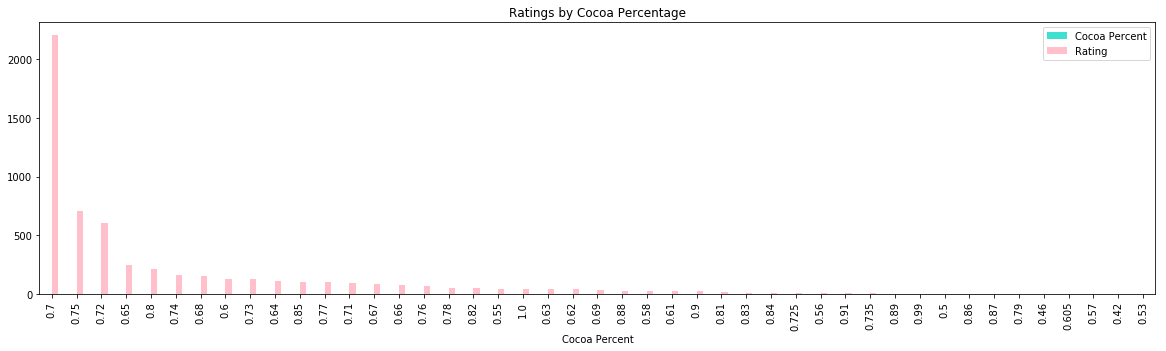

In [139]:
colors= ['turquoise', 'pink']
Choc1= Choc[['Cocoa Percent', 'Rating']]
Choc2= Choc1.groupby(['Cocoa Percent'])['Rating'].sum().reset_index()
Choc3= Choc2.sort_values(by='Rating', ascending=False) 
Choc3.index=Choc3['Cocoa Percent']
Choc3.plot(kind='bar', color= colors, figsize=(20,5))
plt.title('Ratings by Cocoa Percentage')
plt.show()

In [117]:
Choc.groupby(['Bean Type','Rating', 'Company Location']).sum()

REF  Review Date  \
Bean Type               Rating Company Location                       
Amazon                  3.25   U.S.A.             1748         2016   
Amazon mix              3.50   U.S.A.             1748         2016   
                        4.00   U.S.A.             1780         2016   
Amazon, ICS             3.50   U.S.A.             1239         2014   
                        3.75   U.S.A.             1744         2016   
Beniano                 3.00   U.S.A.             1243         2014   
                        3.75   U.S.A.             1780         2016   
                        4.00   U.S.A.             1744         2016   
Blend                   2.00   U.S.A.              228         4013   
                        2.50   Australia           999         2012   
                               U.S.A.             1367         2014   
                        2.75   U.S.A.              311         2009   
                        3.00   France              117         2007   
                               Spain               117         2007   
                               U.S.A.             1676        14053   
                        3.25   Canada             1339         2014   
                               Switzerland        1442         2014   
                               U.S.A.             1303         2014   
                        3.50   Belgium             166         2007   
                               Canada             2366         4026   
                               France              230         2008   
                               Italy              1884         6029   
                               U.S.A.             4228        14068   
                        3.75   Italy               272         2008   
                               U.S.A.             2497         6035   
                        4.00   Belgium             111         2007   
                               Canada             1734         4024   
                               Italy               186         4013   
                        5.00   Italy                40         2006   
Blend-Forastero,Criollo 3.75   Italy               308         2008   
...                                                ...          ...   
                        3.50   Venezuela          2270         4026   
                        3.75   Australia         11243        14106   
                               Austria            2401         6035   
                               Bolivia             709         2011   
                               Brazil             1880         2016   
                               Canada             7207        10072   
                               Colombia           5294         6047   
                               Denmark             923         2012   
                               Ecuador            1415         2014   
                               France             8808        22124   
                               Guatemala           987         2012   
                               Hungary             939         2012   
                               Israel              431         2009   
                               Italy              2651         4027   
                               Lithuania          1046         2013   
                               New Zealand        1263         2014   
                               Poland             1844         2016   
                               Spain               523         2010   
                               Switzerland        1458         4022   
                               U.K.               3502        10054   
                               U.S.A.            61212        98661   
                               Venezuela          3928         6041   
                        4.00   Australia          1622         2015   
                               Canada             4428         8052   
    

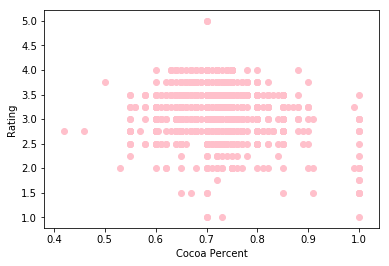

In [136]:
plt.scatter(x= Choc['Cocoa Percent'], y= Choc['Rating'], color= 'pink')
plt.ylabel('Rating')
plt.xlabel('Cocoa Percent')
plt.show()

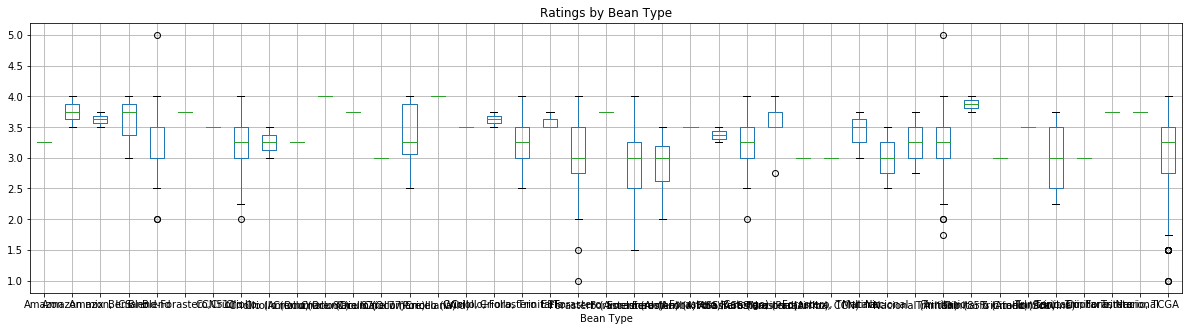

In [149]:
Choc.boxplot('Rating', by= 'Bean Type', figsize=(20, 5))
plt.title('Ratings by Bean Type')
plt.suptitle("")
plt.show()